In [2]:
import numpy as np
import pandas as pd
import open3d as o3d
import matplotlib.pyplot as plt
import matplotlib.image as mp
from PIL import Image
import cv2

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [3]:
def read_compacted_imgs(path):
    obj = np.load(path)
    imgs = obj['imgs']
    lens = obj['lens']
    result = []
    for img, l in zip(imgs, lens):
        img = img[:l]
        img = np.frombuffer(img, dtype=np.uint8)
        result.append(cv2.imdecode(img, cv2.IMREAD_GRAYSCALE))
    result = np.stack(result, axis=0)
    return result

In [4]:
res=read_compacted_imgs(r'C:\Users\wyh196646\Desktop\视野检查\95244.npz')

In [12]:
img=np.load(r'C:\Users\wyh196646\Desktop\视野检查\71038.npy')

In [13]:
def down_resample(image):
    return (image[:,:,::2]+image[:,:,1::2])//2

In [26]:
def cut_cp_from_images(img_array):
    volume= np.stack(img_array,axis=0)
    volume=down_resample(img_array)
    volume=volume.transpose(0,2,1)
    x,y=np.mgrid[0:256:1,0:256:1]
    disc=(x-255/2)**2+(y-255/2)**2
    valid_mask=np.abs(disc-3600)<60
    theta=np.arctan2(x-255/2,y-255/2)
    masked_theta=theta[valid_mask]
    masked_volume=volume[valid_mask,:]
    img = masked_volume[masked_theta.argsort()]
    img=cv2.resize(img,dsize=(380,380),interpolation=cv2.INTER_LINEAR)
    return img.transpose()
    

In [27]:
data=cut_cp_from_images(img)

In [28]:
data.shape

(380, 380)

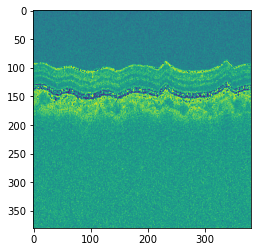

In [44]:
def show_img(img):
    """ 读取并展示图片

    :param path: 图片路径
    :return:
    """
    
    #print('图片的shape:', img.shape)
    plt.imshow(img)
    plt.show()


show_img(data)


In [68]:

im = Image.fromarray(result)
im=im.resize((380,380))
im.save( "result.jpeg")
